<a href="https://colab.research.google.com/github/gbiamgaurav/ml_basics_concepts-/blob/main/Recommender_Systems_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### Import libraries

import numpy as np
import pandas as pd

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gbiamgaurav","key":"25adcca0b19d33a63cbc1bc66924e01d"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d sherinclaudia/movielens

  0% 0.00/5.83M [00:00<?, ?B/s]
100% 5.83M/5.83M [00:00<00:00, 109MB/s]


In [7]:
! unzip /content/movielens.zip

Archive:  /content/movielens.zip
  inflating: movies.dat              
  inflating: ratings.dat             
  inflating: users.dat               


In [18]:
### Get the data

movies_cols = ['Item_ID','Title','Genres']
ratings_cols = ['UserID','Item_ID','Rating','Timestamp']
users_cols = ['UserID','Gender','Age','Occupation','Zip-code']

In [19]:
# DataSet 1
movies = pd.read_csv('/content/movies.dat', sep = '::',header = None, names = movies_cols, encoding = 'latin 1')
                     
# DataSet 2
ratings = pd.read_csv('/content/ratings.dat',sep = '::', header = None, names = ratings_cols)
                     
# DataSet 3
users = pd.read_csv('/content/users.dat',sep = '::', header = None, names = users_cols)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [20]:
movies.head()

,Item_ID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [21]:
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [22]:
ratings.head()

,UserID,Item_ID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [24]:
### merge the data together 

df = pd.merge(ratings, movies, on='Item_ID')
df.head()

,UserID,Item_ID,Rating,Timestamp,Title,Genres
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


### Exploratory Data Analysis

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [26]:
### lets create a rating dataframe with average rating and number of ratings

In [27]:
df.groupby('Title')['Rating'].mean().sort_values(ascending=False).head()

Title
Ulysses (Ulisse) (1954)     5.0
Lured (1947)                5.0
Follow the Bitch (1998)     5.0
Bittersweet Motel (2000)    5.0
Song of Freedom (1936)      5.0
Name: Rating, dtype: float64

In [28]:
df.groupby('Title')['Rating'].count().sort_values(ascending=False).head()

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Name: Rating, dtype: int64

In [29]:
ratings = pd.DataFrame(df.groupby('Title')['Rating'].mean())

In [30]:
ratings.head()

,Rating
Title,
"$1,000,000 Duck (1971)",3.027027
'Night Mother (1986),3.371429
'Til There Was You (1997),2.692308
"'burbs, The (1989)",2.910891
...And Justice for All (1979),3.713568


In [31]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('Title')['Rating'].count())
ratings.head()

,Rating,num of ratings
Title,,
"$1,000,000 Duck (1971)",3.027027,37
'Night Mother (1986),3.371429,70
'Til There Was You (1997),2.692308,52
"'burbs, The (1989)",2.910891,303
...And Justice for All (1979),3.713568,199


In [32]:
### Now a few Histograms

In [38]:
ratings.columns

Index(['Rating', 'num of ratings'], dtype='object')

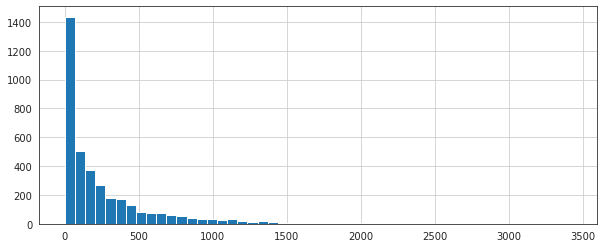

In [43]:
plt.figure(figsize=(10, 4))
ratings['num of ratings'].hist(bins=50)

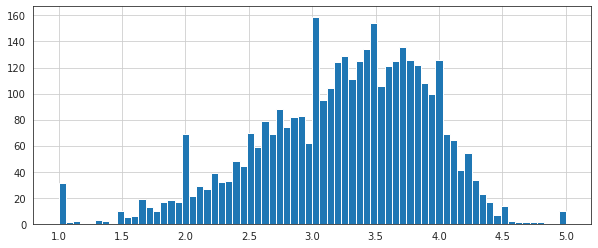

In [44]:
plt.figure(figsize=(10, 4))
ratings['Rating'].hist(bins=70)

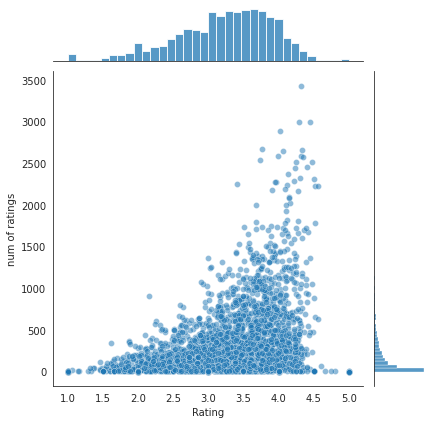

In [45]:
sns.jointplot(x="Rating", y="num of ratings", data=ratings, alpha=0.5)

In [46]:
### Recommending Simillar Movies

In [47]:
moviemat = df.pivot_table(index="UserID", columns="Title", values="Rating")

In [48]:
moviemat.head()

Title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
UserID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
ratings.sort_values('num of ratings', ascending=False).head(10)

,Rating,num of ratings
Title,,
American Beauty (1999),4.317386,3428
Star Wars: Episode IV - A New Hope (1977),4.453694,2991
Star Wars: Episode V - The Empire Strikes Back (1980),4.292977,2990
Star Wars: Episode VI - Return of the Jedi (1983),4.022893,2883
Jurassic Park (1993),3.763847,2672
Saving Private Ryan (1998),4.337354,2653
Terminator 2: Judgment Day (1991),4.058513,2649
"Matrix, The (1999)",4.315830,2590
Back to the Future (1985),3.990321,2583


Lets choose two movies `Matrix, The` and `Back to the Future`

In [50]:
ratings.head()

,Rating,num of ratings
Title,,
"$1,000,000 Duck (1971)",3.027027,37
'Night Mother (1986),3.371429,70
'Til There Was You (1997),2.692308,52
"'burbs, The (1989)",2.910891,303
...And Justice for All (1979),3.713568,199


In [51]:
matrix_user_ratings = moviemat['Matrix, The (1999)']
bttf_user_ratings = moviemat['Back to the Future (1985)']

matrix_user_ratings.head()

UserID
1    NaN
2    4.0
3    NaN
4    NaN
5    5.0
Name: Matrix, The (1999), dtype: float64

In [52]:
similar_to_matrix = moviemat.corrwith(matrix_user_ratings)
similar_to_bttf = moviemat.corrwith(bttf_user_ratings)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [53]:
corr_matrix = pd.DataFrame(similar_to_matrix, columns=['correlation'])
corr_matrix.dropna(inplace=True)
corr_matrix.head()

,correlation
Title,
"$1,000,000 Duck (1971)",-0.010290
'Night Mother (1986),0.034112
'Til There Was You (1997),0.266120
"'burbs, The (1989)",0.117547
...And Justice for All (1979),0.130814


In [54]:
corr_matrix.sort_values('correlation', ascending=False).head(10)

,correlation
Title,
Hatchet For the Honeymoon (Rosso Segno Della Follia) (1969),1.0
Finding North (1999),1.0
Little Men (1998),1.0
Sunset Park (1996),1.0
"Matrix, The (1999)",1.0
Talk of Angels (1998),1.0
Theodore Rex (1995),1.0
Year of the Horse (1997),1.0
Sacco and Vanzetti (Sacco e Vanzetti) (1971),1.0


In [55]:
corr_matrix = corr_matrix.join(ratings['num of ratings'])
corr_matrix.head()

,correlation,num of ratings
Title,,
"$1,000,000 Duck (1971)",-0.010290,37
'Night Mother (1986),0.034112,70
'Til There Was You (1997),0.266120,52
"'burbs, The (1989)",0.117547,303
...And Justice for All (1979),0.130814,199


In [56]:
corr_matrix[corr_matrix['num of ratings']>100].sort_values('correlation', ascending=False).head()

,correlation,num of ratings
Title,,
"Matrix, The (1999)",1.000000,2590
Bed of Roses (1996),0.503039,120
"Palm Beach Story, The (1942)",0.425571,104
Dead Man on Campus (1998),0.420561,130
"Gods Must Be Crazy II, The (1989)",0.393565,128


In [57]:
corr_bttf = pd.DataFrame(similar_to_bttf, columns=['correlation'])
corr_bttf.dropna(inplace=True)
corr_bttf.head()

,correlation
Title,
"$1,000,000 Duck (1971)",0.237539
'Night Mother (1986),0.307368
'Til There Was You (1997),-0.010990
"'burbs, The (1989)",0.145238
...And Justice for All (1979),0.116745


In [58]:
corr_bttf.sort_values('correlation', ascending=False).head(10)
corr_bttf = corr_bttf.join(ratings['num of ratings'])
corr_bttf[corr_bttf['num of ratings']>100].sort_values('correlation', ascending=False).head()

,correlation,num of ratings
Title,,
Back to the Future (1985),1.000000,2583
Back to the Future Part II (1989),0.590473,1158
Back to the Future Part III (1990),0.564026,1148
Superman (1978),0.427763,1222
"Honey, I Shrunk the Kids (1989)",0.414638,1045
